# Assignment 1: Naive Bayes [20 marks]

Student Name:Han Wang

Student ID:1041260

## General info

<b>Due date</b>: Friday, 8 April 2022 5pm

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: completed copy of this iPython notebook

<b>Late submissions</b>: -10% per day up to 5 days (both weekdays and weekends count)
<ul>
    <li>one day late, -2.0;</li>
    <li>two days late, -4.0;</li>
    <li>three days late, -6.0;</li>
    <li>four days late, -8.0;</li>
    <li>five days late, -10.0;</li>
</ul>

<b>Marks</b>: 20% of mark for class. 

<b>Materials</b>: See [Using Jupyter Notebook and Python page](https://canvas.lms.unimelb.edu.au/courses/124196/pages/python-and-jupyter-notebooks?module_item_id=3512182) on Canvas (under Modules> Coding Resources) for information on the basic setup required for this class, including an iPython notebook viewer and the python packages NLTK, Numpy, Scipy, Matplotlib, Scikit-Learn, and Gensim. You can use any Python built-in packages, but do not use any other 3rd party packages; if your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  


<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should implement functions for the skeletons listed below. You may implement any number of additional (helper) functions. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions. 

You will be marked not only on the correctness of your methods, but also the quality and efficency of your code: in particular, you should be careful to use Python built-in functions and operators when appropriate and pick descriptive variable names that adhere to <a href="https://www.python.org/dev/peps/pep-0008/">Python style requirements</a>. If you think it might be unclear what you are doing, you should comment your code to help the marker make sense of it. We reserve the right to deduct up to 4 marks for unreadable or exessively inefficient code.

8 of the marks available for this Project will be assigned to whether the five specified Python functions work in a manner consistent with the materials from COMP90049. Any other implementation will not be directly assessed (except insofar as it is required to make these five functions work correctly).

12 of the marks will be assigned to your responses to the questions, in terms of both accuracy and insightfulness. We will be looking for evidence that you have an implementation that allows you to explore the problem, but also that you have thought deeply about the data and the behaviour of the Naive Bayes classifier.

<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on the discussion board (Piazza -> Assignments -> A2); we recommend you check it regularly.

<b>Academic misconduct</b>: For most people, collaboration will form a natural part of the undertaking of this homework, and we encourge you to discuss it in general terms with other students. However, this ultimately is still an individual task, and so reuse of code or other instances of clear influence will be considered cheating. Please check the <a href="https://canvas.lms.unimelb.edu.au/courses/124196/modules#module_662096">CIS Academic Honesty training</a> for more information. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.

**IMPORTANT**

Please carefully read and fill out the <b>Authorship Declaration</b> form at the bottom of the page. Failure to fill out this form results in the following deductions: 
<UL TYPE=”square”>
<LI>missing Authorship Declaration at the bottom of the page, -10.0
<LI>incomplete or unsigned Authorship Declaration at the bottom of the page, -5.0
</UL>

## Part 1: Base code [8 marks]

Instructions
1. Do **not** shuffle the data set
2. Treat the features as continuous numeric and use them as provided (e.g., do **not** convert them to other feature types, such as discrete ones). Implement a Naive Bayes classifier with appropriate likelihood function for the data
3. You should implement the Naive Bayes classifier from scratch. Do **not** use existing implementations/learning algorithms.
4. Apart from the instructions in point 3, you may use libraries to help you with data reading, representation, maths or evaluation
5. Ensure that all and only required information is printed, as indicated in the final three code cells. Failure to adhere to print the required information will result in **[-1 mark]** per case. *(We don't mind details like you print a list or several numbers -- just make sure the information is displayed so that it's easily accessible)*

In [1]:
# This function should open a csv file and read the data into a useable format [1 mark]
def preprocess(filename):
    data = pd.read_csv(filename).iloc[:,1:]
    return data

In [2]:
# This function should build a supervised NB model [3 marks]
def train(train_feature, train_label, label_list):
    prior = {}
    size = train_label.size
    for i in label_list:
        prior[i] = np.log2(train_label.value_counts()[i]/size)
    likelihood = {}
    for i in label_list:
        likelihood[i] = []
        columns = train_feature.columns
        for j in columns:
            seperate_by_class = train_feature[j][train_label == i]
            likelihood[i].append({"mean":seperate_by_class.mean(), "std":seperate_by_class.std()})
    model = (prior, likelihood)
    return model

In [3]:
# This function help to calculate the prob of normal distribution
def Gaussian(value, mean, stand):
    prediction = (1 / (math.sqrt(math.pi * 2) * stand)) * math.exp(-((value - mean) ** 2 / (2 * stand ** 2)))
    if prediction == 0:
        prediction += 10**(-9)
    return prediction

In [4]:
# This function should predict the class for a set of instances, based on a trained model [2 marks]
def predict(test_feature, model, label_list):
    prediction = []
    probility = []
    feature = test_feature.shape[0]
    for i in range(feature):
        posterior = {}
        for j in label_list:
            prob = model[0][j]
            for k in range (test_feature.iloc[i,:].size):
                value = test_feature.iloc[i,:][k]
                prob += np.log2(Gaussian(value, model[1][j][k]['mean'], model[1][j][k]['std']))
            posterior[j] = prob
        keywords = posterior.get
        prediction.append(max(posterior, key = keywords))
        probility.append(posterior)
    return prediction, probility
            
     

In [5]:
def calculate(matrix, class1):
    index1 = ["TRUE", "FALSE"] 
    column1 = ["POSITIVE", "NEGATIVE", "PRECISION", "RECALL", "F1-SCORE"]
    output = pd.DataFrame(index = index1, columns = column1)
    tp = matrix.loc[class1, class1]
    fp = matrix.loc[:,class1].sum() - tp
    fn = matrix.loc[class1,:].sum() - tp
    tn = matrix.sum().sum() - tp - fp - fn
    output.loc["TRUE", "POSITIVE"] = tp
    output.loc["TRUE", "NEGATIVE"] = tn
    output.loc["FALSE", "POSITIVE"] = fp
    output.loc["FALSE", "NEGATIVE"] = fn
    if tp == 0:
        output.loc["TRUE", "PRECISION"] = 0
        output.loc["TRUE", "RECALL"] = 0
        output.loc["TRUE", "F1-SCORE"] = 0
    else:
        output.loc["TRUE", "PRECISION"] = tp /(tp + fp)
        output.loc["TRUE", "RECALL"] = tp /(tp + fn)
        output.loc["TRUE", "F1-SCORE"] = 2 * (tp /(tp + fp)) * (tp /(tp + fn)) / ((tp /(tp + fp)) + (tp /(tp + fn)))
    
    return output 

In [6]:
# This function should evaluate a set of predictions [1 mark]
def evaluate(predicted, true, label_list, model):
    result = pd.DataFrame()
    result["Predicted_Label"] = predicted
    true.reset_index(inplace = True, drop = True)
    result["True_Label"] = true
    true_length = (result["True_Label"] == result["Predicted_Label"]).value_counts()[True]
    labels = result.iloc[:,1].value_counts().keys()
    matrix = pd.DataFrame(index = labels, columns = labels)
    for i in labels:
        for j in labels:
            matrix.loc[i,j] = result[(result["True_Label"] == i) & (result["Predicted_Label"] == j)].shape[0]
    data_dict = {}
    precison = 0
    recall = 0
    for i in label_list:
        data_dict[i] = calculate(matrix, i)
        precison += data_dict[i].loc["TRUE", "PRECISION"]
        recall += data_dict[i].loc["TRUE", "RECALL"]
    length = len(label_list)
    print("Acurracy: ", true_length / result.shape[0])
    print("Confusion:")
    print(matrix)
    print("Precision: ", precison / length)
    print("Recall: ", recall / length)
    print("Zero-R accurate: ", 2**max(model[0].values()))
    return


In [7]:
# This cell should act as your "main" function where you call the above functions 
# on the full OBJECTIVITY data set, and print the evaluation score. [0.33 marks]



# First, read in the data and apply your NB model to the OBJECTIVITY data

import pandas as pd
import numpy as np
import math
data = preprocess("objectivity.csv")
label_list = list(data.Label.unique())
model = train(data.drop(columns = "Label"), data["Label"], label_list)
prediction, prob_prediction = predict(data.drop(columns = "Label"), model, label_list)



# Second, print the full evaluation results from the evaluate() function
evaluate(prediction, data.Label, label_list, model)






# Third, print data statistics and model predictions, as instructed below 
# N is the total number of instances, F the total number of features, L the total number of labels
# The "class probabilities" may be unnormalized
# The "predicted class ID" must be in range (0, L)

print("Feature vectors of instances [0, 1, 2]: ", "\n", data.iloc[0,1:], "\n", data.iloc[1,1:], "\n", data.iloc[2,1:])

print("\nNumber of instances (N): ", data.shape[0])
print("Number of features (F): ", data.shape[1] - 1)
print("Number of labels (L): ", len(label_list))

print("\n\nPredicted class probabilities for instance N-3: ", prob_prediction[data.shape[0] - 3])
print("Predicted class ID for instance N-3: ", max(prob_prediction[data.shape[0] - 2],key=lambda x:prob_prediction[data.shape[0] - 3][x]))
print("\nPredicted class probabilities for instance N-2: ", prob_prediction[data.shape[0] - 2])
print("Predicted class ID for instance N-2: ", max(prob_prediction[data.shape[0] - 2],key=lambda x:prob_prediction[data.shape[0] - 2][x]))
print("\nPredicted class probabilities for instance N-1: ", prob_prediction[data.shape[0] - 1])
print("Predicted class ID for instance N-1: ", max(prob_prediction[data.shape[0] - 2],key=lambda x:prob_prediction[data.shape[0] - 1][x]))



Acurracy:  0.792
Confusion:
           objective subjective
objective        555         80
subjective       128        237
Precision:  0.7801127887266698
Recall:  0.7616654082623233
Zero-R accurate:  0.635
Feature vectors of instances [0, 1, 2]:  
 totalWordsCount     109
FW                    8
JJ                    0
JJR                   0
LS                    0
NN                    0
NNPS                 12
NNS                   0
POS                   1
PRP                   2
PRP$                  2
RBR                   0
RBS                   2
UH                    0
VBD                   0
VBZ                   0
Quotes                0
questionmarks         0
exclamationmarks      0
fullstops             4
pronouns1st           0
pronouns2nd           0
pronouns3rd           3
Name: 0, dtype: object 
 totalWordsCount     309
FW                   35
JJ                    0
JJR                   0
LS                    2
NN                    1
NNPS                 17
NNS  

In [8]:
# This cell should act as your "main" function where you call the above functions 
# on the full ADULT data set, and print the evaluation score. [0.33 marks]



# First, read in the data and apply your NB model to the ADULT data


import pandas as pd
import numpy as np
import math
data = preprocess("adult.csv")
label_list = list(data.Label.unique())
model = train(data.drop(columns = "Label"), data["Label"], label_list)
prediction, prob_prediction = predict(data.drop(columns = "Label"), model, label_list)


# Second, print the full evaluation results from the evaluate() function

evaluate(prediction, data.Label, label_list, model)




# Third, print data statistics and model predictions, as instructed below 
# N is the total number of instances, F the total number of features, L the total number of labels
# The "class probabilities" may be unnormalized
# The "predicted class ID" must be in range (0, L)

print("Feature vectors of instances [0, 1, 2]: ", "\n", data.iloc[0,1:], "\n", data.iloc[1,1:], "\n", data.iloc[2,1:])

print("\nNumber of instances (N): ", data.shape[0])
print("Number of features (F): ", data.shape[1] - 1)
print("Number of labels (L): ", len(label_list))

print("\n\nPredicted class probabilities for instance N-3: ", prob_prediction[data.shape[0] - 3])
print("Predicted class ID for instance N-3: ", max(prob_prediction[data.shape[0] - 2],key=lambda x:prob_prediction[data.shape[0] - 3][x]))
print("\nPredicted class probabilities for instance N-2: ", prob_prediction[data.shape[0] - 2])
print("Predicted class ID for instance N-2: ", max(prob_prediction[data.shape[0] - 2],key=lambda x:prob_prediction[data.shape[0] - 2][x]))
print("\nPredicted class probabilities for instance N-1: ", prob_prediction[data.shape[0] - 1])
print("Predicted class ID for instance N-1: ", max(prob_prediction[data.shape[0] - 2],key=lambda x:prob_prediction[data.shape[0] - 1][x]))



Acurracy:  0.8016
Confusion:
      <=50K >50K
<=50K  1817   96
>50K    400  187
Precision:  0.7401766943837453
Recall:  0.6341930180928304
Zero-R accurate:  0.7652
Feature vectors of instances [0, 1, 2]:  
 Age                   31
fnlwgt            142470
Education-num         13
Capital-gain           0
Capital-loss           0
Hours-per-week        40
Name: 0, dtype: object 
 Age                   31
fnlwgt            323069
Education-num          9
Capital-gain           0
Capital-loss           0
Hours-per-week        20
Name: 1, dtype: object 
 Age                   25
fnlwgt            122489
Education-num         13
Capital-gain           0
Capital-loss        1726
Hours-per-week        60
Name: 2, dtype: object

Number of instances (N):  2500
Number of features (F):  6
Number of labels (L):  2


Predicted class probabilities for instance N-3:  {'<=50K': -56.18429822582242, '>50K': -59.80824868082521}
Predicted class ID for instance N-3:  <=50K

Predicted class probabilities fo

In [9]:
# This cell should act as your "main" function where you call the above functions 
# on the full ABSENTEEISM data set, and print the evaluation score. [0.33 marks]



# First, read in the data and apply your NB model to the ABSENTEEISM data


import pandas as pd
import numpy as np
import math
data = preprocess("absenteeism.csv")
label_list = list(data.Label.unique())
model = train(data.drop(columns = "Label"), data["Label"], label_list)
prediction, prob_prediction = predict(data.drop(columns = "Label"), model, label_list)



# Second, print the full evaluation results from the evaluate() function



evaluate(prediction, data.Label, label_list, model)


# Third, print data statistics and model predictions, as instructed below 
# N is the total number of instances, F the total number of features, L the total number of labels
# The "class probabilities" may be unnormalized
# The "predicted class ID" must be in range (0, L)

print("Feature vectors of instances [0, 1, 2]: ", "\n", data.iloc[0,1:], "\n", data.iloc[1,1:], "\n", data.iloc[2,1:])

print("\nNumber of instances (N): ", data.shape[0])
print("Number of features (F): ", data.shape[1] - 1)
print("Number of labels (L): ", len(label_list))

print("\n\nPredicted class probabilities for instance N-3: ", prob_prediction[data.shape[0] - 3])
print("Predicted class ID for instance N-3: ", max(prob_prediction[data.shape[0] - 2],key=lambda x:prob_prediction[data.shape[0] - 3][x]))
print("\nPredicted class probabilities for instance N-2: ", prob_prediction[data.shape[0] - 2])
print("Predicted class ID for instance N-2: ", max(prob_prediction[data.shape[0] - 2],key=lambda x:prob_prediction[data.shape[0] - 2][x]))
print("\nPredicted class probabilities for instance N-1: ", prob_prediction[data.shape[0] - 1])
print("Predicted class ID for instance N-1: ", max(prob_prediction[data.shape[0] - 2],key=lambda x:prob_prediction[data.shape[0] - 1][x]))



Acurracy:  0.35222052067381315
Confusion:
      8   2   3   1   0 >24 24
8    96  33  44   6  17   5  7
2    31  59  46   9   2   7  3
3    29  28  42   9   3   1  0
1    24  17  24  13   4   0  6
0    14   5   4   7  11   0  3
>24  11   2   4   2   2   6  1
24    3   4   1   3   1   1  3
Precision:  0.2979247813986058
Recall:  0.28740680384219963
Zero-R accurate:  0.31852986217457885
Feature vectors of instances [0, 1, 2]:  
 Service time                   18
Age                            50
Work load Average/day     239.554
Hit target                     97
Son                             1
Pet                             0
Weight                         98
Height                        178
Body mass index                31
Name: 0, dtype: object 
 Service time                   18
Age                            38
Work load Average/day     239.554
Hit target                     97
Son                             0
Pet                             0
Weight                         89


# Part 2: Conceptual questions [12 marks]

## Question 1: Evaluation strategy [3 marks]

In [10]:
# Write additional code here, if necessary (you may insert additional code cells)
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import math

data = preprocess("objectivity.csv")
label_list = list(data.Label.unique())
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns = "Label"), data.Label, test_size=0.2, random_state=42)
model = train(x_train, y_train, label_list)
prediction, _ = predict(x_test, model, label_list)
evaluate(prediction, y_test, label_list, model)

Acurracy:  0.79
Confusion:
           objective subjective
objective        107         17
subjective        25         51
Precision:  0.7803030303030303
Recall:  0.7669779286926994
Zero-R accurate:  0.63875


Provide your text answer of 100-150 words in this cell.

By compare the three results, all of them decrease for a little bit. Actually, the accurate rate of test will never higher than the accurate rate of train, because the model is optimized by the train data. This means that the test uses the model of train, so it cannot as accurate as the model of itself. If there are some new instances, which means never happen in train models, the result will not accurate. As a consequence, using train data to test is a wrong choice because the result will over optimistic. In the real world, the test data will not the same as train data, it is better to choose new data so that we can learn from the test.





## Question 2: Feature standardization [2 marks]

In [11]:
# Write additional code here, if necessary (you may insert additional code cells)

Provide your text answer of 100-150 words in this cell.

Feature standardization means standardize data by subtracting the mean and then dividing by the variance. To make the value have zero-mean and unit-variance. Firstly, we need to calculate the distribution mean and standard deviation. And then, divide the values of every instance by its standard deviation.
For Gaussian Naïve Bayes classifier, the probability of the value uses the function(Probability Density Function), which called PDF. The only difference between PDF and Normal PDF is that add the standard normal distribution, which is scaled by mean. But the value mean + 0.5 standard deviation is the same as the origin probability. Consequently, in Gaussian Naïve Bayes classifier, the probability will not change, and the result will not change. So, we can say the Gaussian Naïve Bayes classifier have standardization by itself. 


## Question 3: Naive Bayes assumptions [2 marks]

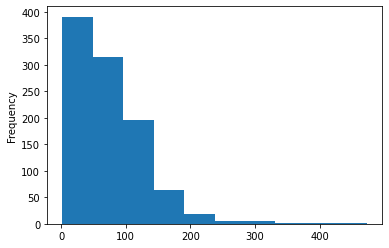

In [12]:
# Write additional code here, if necessary (you may insert additional code cells)
a = data["FW"].plot.hist()

In [13]:
data.corr()

,totalWordsCount,FW,JJ,JJR,LS,NN,NNPS,NNS,POS,PRP,...,UH,VBD,VBZ,Quotes,questionmarks,exclamationmarks,fullstops,pronouns1st,pronouns2nd,pronouns3rd
totalWordsCount,1.000000,0.980416,0.696009,0.702140,0.791851,0.456650,0.919123,0.423759,0.793812,0.840559,...,0.790048,0.890128,0.704837,0.057361,0.576761,0.203342,0.919200,0.501285,0.564170,0.802912
FW,0.980416,1.000000,0.691682,0.684645,0.763780,0.456005,0.914988,0.390069,0.743604,0.823196,...,0.737380,0.876908,0.711894,0.064259,0.533813,0.184856,0.878764,0.457993,0.522194,0.774438
JJ,0.696009,0.691682,1.000000,0.518882,0.645191,0.226665,0.645691,0.296100,0.545510,0.578256,...,0.587884,0.615098,0.546748,-0.007403,0.483970,0.184978,0.614681,0.299160,0.426286,0.558371
JJR,0.702140,0.684645,0.518882,1.000000,0.575935,0.332808,0.665866,0.338214,0.532190,0.601060,...,0.574393,0.592037,0.497882,-0.008925,0.420193,0.195020,0.634557,0.292552,0.372786,0.583364
LS,0.791851,0.763780,0.645191,0.575935,1.000000,0.327094,0.702399,0.413058,0.680435,0.623030,...,0.711433,0.644860,0.550888,-0.139770,0.544188,0.179800,0.710072,0.366331,0.527504,0.656765
NN,0.456650,0.456005,0.226665,0.332808,0.327094,1.000000,0.452648,0.133390,0.298254,0.386305,...,0.335923,0.418549,0.260579,0.168449,0.245768,0.050617,0.492122,0.207772,0.116434,0.365840
NNPS,0.919123,0.914988,0.645691,0.665866,0.702399,0.452648,1.000000,0.347775,0.603734,0.739757,...,0.661103,0.816053,0.648086,0.105889,0.493103,0.142737,0.850773,0.379795,0.421773,0.662237
NNS,0.423759,0.390069,0.296100,0.338214,0.413058,0.133390,0.347775,1.000000,0.447976,0.376628,...,0.428512,0.338774,0.302908,-0.074274,0.281727,0.157996,0.360765,0.247335,0.393426,0.391097
POS,0.793812,0.743604,0.545510,0.532190,0.680435,0.298254,0.603734,0.447976,1.000000,0.710750,...,0.760130,0.709488,0.555117,-0.017409,0.501195,0.191705,0.752697,0.682861,0.710461,0.865628
PRP,0.840559,0.823196,0.578256,0.601060,0.623030,0.386305,0.739757,0.376628,0.710750,1.000000,...,0.708269,0.766968,0.547674,0.113256,0.519929,0.246220,0.780362,0.457576,0.495908,0.828328


Provide your text answer of 100-150 words in this cell.

The first assumption is not always true. This assumption means that with continuous data features, Naïve Bayes makes every class’s value distributed, because of the normal distribution. But in our data, for the continuous data, we segment the data by the class and calculate the mean and standard deviation of the class. In the upper histogram, the result is obviously not normal distribution.
The independence assumption means no pair of features are dependent. This assumption is not always true. For example, we have “weight” and “son” which is not associated, but “height” , “weight” and “body mass index” are connected with each other. They are not conditional independent class. We can see from data.corr(), for example, the correlation of “FW” and “JJ” is 0.696009. They are obvious not independent.


## Question 4: Feature Selection and Ethics [5 marks]
- Question 4.1: [3.5 marks]
- Question 4.2: [1.5 mark]

In [14]:
data4 =  preprocess("adult_nominal_for_q4.csv")
ls = list(data4[data4.values == "?"].index)
data4 = data4.drop(index = ls, axis = 0)
data4 = data4.reset_index(drop = True)
data4

,Label,Workclass,Education,Marital-status,Occupation,Relationship,Race,Sex,Native-country
0,<=50K,Federal-gov,Bachelors,Never-married,Exec-managerial,Not-in-family,Black,Female,United-States
1,<=50K,Private,Bachelors,Never-married,Exec-managerial,Own-child,White,Female,United-States
2,>50K,Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,Black,Male,United-States
3,<=50K,Private,HS-grad,Never-married,Farming-fishing,Own-child,White,Male,United-States
4,<=50K,Private,Bachelors,Married-civ-spouse,Prof-specialty,Other-relative,Asian-Pac-Islander,Female,Philippines
...,...,...,...,...,...,...,...,...,...
2298,>50K,Private,Masters,Divorced,Prof-specialty,Own-child,White,Female,United-States
2299,<=50K,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
2300,<=50K,Private,Bachelors,Separated,Exec-managerial,Not-in-family,White,Female,United-States
2301,<=50K,Private,Some-college,Never-married,Prof-specialty,Not-in-family,White,Male,United-States


In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data4_x = data4.drop(columns = "Label").apply(le.fit_transform)
data4_x

,Workclass,Education,Marital-status,Occupation,Relationship,Race,Sex,Native-country
0,0,9,3,3,1,2,0,33
1,2,9,3,3,3,4,0,33
2,2,11,1,13,0,2,1,33
3,2,11,3,4,3,4,1,33
4,2,9,1,9,2,1,0,25
...,...,...,...,...,...,...,...,...
2298,2,12,0,9,3,4,0,33
2299,2,9,1,9,0,4,1,33
2300,2,9,4,3,1,4,0,33
2301,2,15,3,9,1,4,1,33


In [16]:
from sklearn.feature_selection import mutual_info_classif
score = mutual_info_classif(data4_x, data4.Label, discrete_features=True)
score

array([0.00949767, 0.06958636, 0.10066801, 0.06259536, 0.11003439,
       0.00456488, 0.02221777, 0.012301  ])

Provide your text answer to **Question 4.1** of 100-150 words in this cell.

Firstly, I got a list to store all lines have "?", and then delete these lines and resort it. Because all of the information needed to be transfer to numeric, I use preprocessing from sklearn to transfer all feature to numeric. In this case, we can use mutual_info_classif to calculate the maximum feature. This maximum feature is the most valuable, “Relationship”, is the one.


Provide your text answer to **Question 4.2** of 50-100 words in this cell.

To some perspective, this method is not very suitable in reality. Because some item is really sensitive. For example, “sex”, “native country” and “race”. If we got the Female have less salary, this may cause some objective bias. So, it is not suitable to choose these features. It is better to choose not sensitive features.


<b>Authorship Declaration</b>:

   (1) I certify that the program contained in this submission is completely
   my own individual work, except where explicitly noted by comments that
   provide details otherwise.  I understand that work that has been developed
   by another student, or by me in collaboration with other students,
   or by non-students as a result of request, solicitation, or payment,
   may not be submitted for assessment in this subject.  I understand that
   submitting for assessment work developed by or in collaboration with
   other students or non-students constitutes Academic Misconduct, and
   may be penalized by mark deductions, or by other penalties determined
   via the University of Melbourne Academic Honesty Policy, as described
   at https://academicintegrity.unimelb.edu.au.

   (2) I also certify that I have not provided a copy of this work in either
   softcopy or hardcopy or any other form to any other student, and nor will
   I do so until after the marks are released. I understand that providing
   my work to other students, regardless of my intention or any undertakings
   made to me by that other student, is also Academic Misconduct.

   (3) I further understand that providing a copy of the assignment
   specification to any form of code authoring or assignment tutoring
   service, or drawing the attention of others to such services and code
   that may have been made available via such a service, may be regarded
   as Student General Misconduct (interfering with the teaching activities
   of the University and/or inciting others to commit Academic Misconduct).
   I understand that an allegation of Student General Misconduct may arise
   regardless of whether or not I personally make use of such solutions
   or sought benefit from such actions.

   <b>Signed by</b>: [Han Wang 1041260]
   
   <b>Dated</b>: [2022/4/5]